# **Image Classification (Cat/Dog)**

The aim of this project is to build and evaluate a robust binary image classification model that can accurately distinguish between cats and dogs using a Convolutional Neural Network (CNN)

In [1]:
# import the required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the data
# Importing the training data
x_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /labels.csv', delimiter=',')

# Importing the testing data
x_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Datasets/Cat and Dog /labels_test.csv', delimiter=',')

In [4]:
x_train

array([[ 37.,  39.,  25., ...,  58.,  54.,  29.],
       [131., 128., 135., ...,  71.,  96.,  74.],
       [ 80.,  92.,  88., ..., 124., 119.,  99.],
       ...,
       [231., 226., 230., ...,  62.,  65.,  72.],
       [ 61.,  61.,  63., ..., 135., 123., 123.],
       [ 64.,  31.,  12., ...,  61.,  49.,  35.]])

In [5]:
y_train # 0 - Dog and 1 - Cat

array([0., 0., 0., ..., 1., 1., 1.])

In [6]:
x_test

array([[118.,  82.,  96., ..., 140.,  79.,  16.],
       [223., 211., 163., ...,  70.,  73.,  78.],
       [ 73.,  67.,  43., ..., 222., 211., 165.],
       ...,
       [249., 245., 242., ...,  73.,  72.,  68.],
       [ 97.,  96., 102., ...,  84.,  78.,  80.],
       [ 94.,  66.,  63., ..., 119.,  96.,  80.]])

In [7]:
# Dimension of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# (2000, 30000) --> 2000 images of each having 30000 columns, each column is a pixel

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [8]:
# pixel values
print('Minimum pixel value:', x_train.min())
print('Maximum pixel value:', x_train.max())

# This represents the image can be RGB

Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [9]:
# reshape the training data
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

# reshape the test data
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [10]:
# data after reshaping
print('Shape of the data after reshaping:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shape of the data after reshaping:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [11]:
# Data scaling
x_train = x_train/255.0
x_test = x_test/255.0

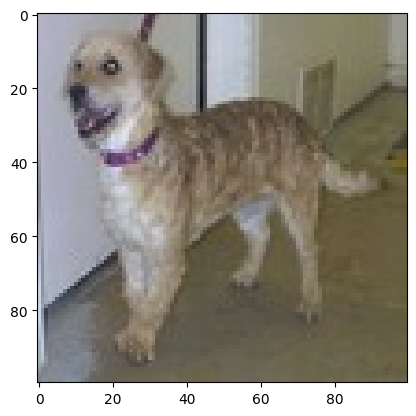

The target label is: [0.]


In [12]:
# printing the first image
plt.imshow(x_train[355, :])
plt.show()

# print the target for the first image
print('The target label is:', y_train[355])


# **CNN Model Building**

In [13]:
# import deep learning libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [14]:
# Creating a validation split
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [15]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(100, 100, 3)
)

base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
#Adding a clean classifier head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

In [17]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Adding data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train_new)

In [19]:
# training the model with the data
history = model.fit(datagen.flow(x_train_new, y_train_new, batch_size=32), epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 44s 471ms/step - accuracy: 0.7416 - loss: 0.5790 - val_accuracy: 0.8750 - val_loss: 0.2534
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8562 - loss: 0.3001 - val_accuracy: 0.9000 - val_loss: 0.2434
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8903 - loss: 0.2526 - val_accuracy: 0.9000 - val_loss: 0.2434
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8876 - loss: 0.2445 - val_accuracy: 0.9050 - val_loss: 0.2683
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9251 - loss: 0.1990 - val_accuracy: 0.9000 - val_loss: 0.2521
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8974 - loss: 0.2279 - val_accuracy: 0.9100 - val_loss: 0.2523
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9081 - loss: 0.2210 - val_accuracy: 0.9200 - val_loss: 0.2489
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9040 - loss: 0.1974 - val_accuracy: 0.8950 

In [20]:
# evaluating the model
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 817ms/step - accuracy: 0.9119 - loss: 0.2116


[0.21065618097782135, 0.9175000190734863]

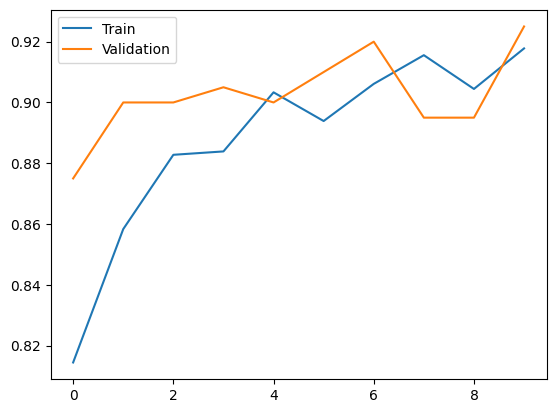

In [21]:
# Training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step


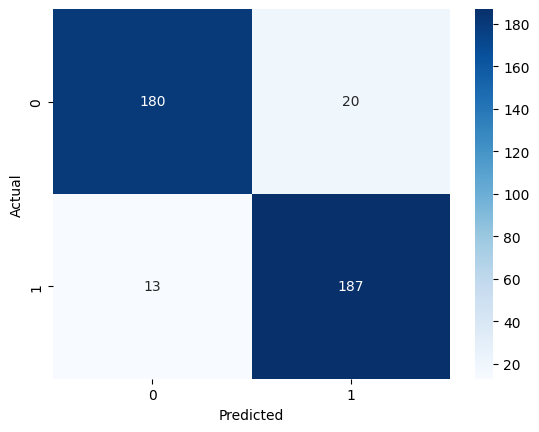

In [22]:
# Confusion matrix
y_prob = model.predict(x_test)
y_pred = (y_prob >= 0.5).astype(int).reshape(-1)
cm = confusion_matrix(y_test.reshape(-1), y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
# trainng data distribution of target
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0. 1.] [1000 1000]


In [24]:
len(x_test)

400

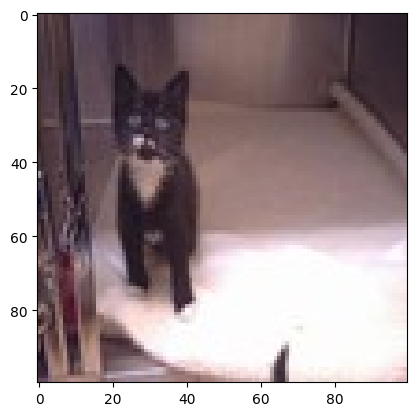

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction Probability: [[0.9878637]]
The actual image is: Cat
The model has predicted as: Cat
The image value 248


In [26]:
# predictions
rdm_img = random.randint(0, len(x_test))
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition
if y_test[rdm_img, :] == 0:
    actual = 'Dog'
else:
    actual = 'Cat'

# prediction for the given image
y_pred = model.predict(x_test[rdm_img, :].reshape(1, 100, 100, 3))
print('Prediction Probability:', y_pred)

if y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'
print('The actual image is:', actual)
print('The model has predicted as:', pred)
print('The image value',rdm_img)

# **Final Conclusion & Limitations**

### **Final Conclusion**

I have used MobileNetV2 for binary image classification (cats vs dogs), the model achieved ~92% test accuracy and showed stable training–validation behavior. The results confirm that leveraging pretrained CNNs can deliver strong performance even with a relatively small dataset, making this approach practical and efficient for real-world image classification tasks.

---

### **Limitations**

- The dataset is small and controlled, so performance may drop on real-world images with different lighting, backgrounds, or breeds.

- Only the classifier head was trained; the base model was not fine-tuned, which may limit peak performance.

- This setup handles binary classification only and would need architectural changes for multi-class problems.